In [2]:
#基准测试
import numpy as np
import torch
import time
import math

n=10000
a=torch.ones([n]) #创建具有n个元素 元素值是1的向量
b=torch.ones([n])

#设置一个定时器
class Timer:
    def __init__(self):
        self.time=[]
        self.start()
    
    def start(self):
        """启动计时器"""
        self.tik=time.time()
    
    def stop(self):
        """停止计时器"""
        self.time.append(time.time()-self.tik) #单位秒
        return self.time[-1]
    
    def avg(self):
        """返回平均时间"""
        return sum(self.time)/len(self.time)
        
    def sum_time(self):
        """返回时间总和"""
        return sum(self.time)
        
    def cumsum(self):
        """返回累计时间"""
        return np.array(self,time).cumsum.tolist()
        

In [4]:
#测试n次循环做一次加法的时间
c=torch.zeros(n)
ti=Timer()
for i in range(n):
    c[i]=a[i]+b[i]
    
print(ti.stop()*1000,"ms")    
f'{ti.stop():.5f} second'

275.0239372253418 ms


'0.27603 second'

In [5]:
#尽量采用矢量矩阵计算
ti.start()
d=a+b  #向量数字位置直接相加
print(d)
f'{ti.stop():.8f} second'

tensor([2., 2., 2.,  ..., 2., 2., 2.])


'0.00297856 second'

[58.44890462 55.14046523 39.28929709 ... 40.34263118 57.69016527
 32.19198758]


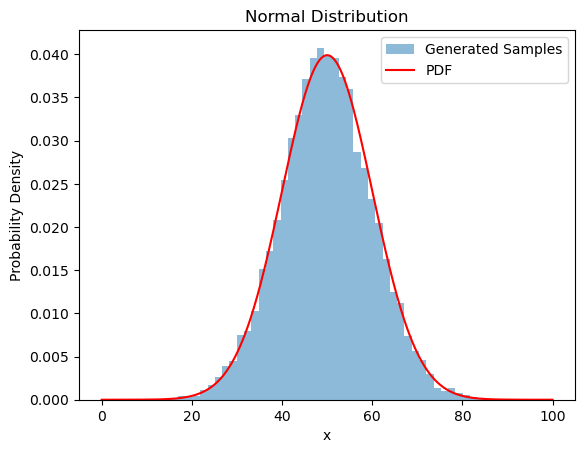

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
#正态分布函数

#可视化正态分布函数
mu=50
sigma=10
# samples_normal=my_normal(mu,sigma,1000)
samples_normal = np.random.normal(mu, sigma, 10000)#生成正态分布随机数
print(samples_normal)

# 绘制正态分布的概率密度函数图形
x_normal = np.linspace(0, 100, 500)  # x轴范围
y_normal = norm.pdf(x_normal, mu, sigma)  # 计算概率密度函数值

# 绘制直方图: 箱子数 概率密度 透明度
plt.hist(samples_normal, bins=50, density=True, alpha=0.5, label='Generated Samples')
plt.plot(x_normal, y_normal, color='red', label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.legend()
plt.show()


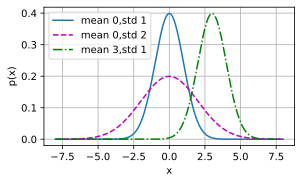

In [2]:
#老师的手搓画图
from matplotlib_inline import backend_inline
import numpy as np
import math

#设置svg格式绘制图表
def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
    """设置图表的大小"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    """设置坐标轴的属性"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()
    
#绘制任意方程对应的曲线及其在指定位置的切线   
def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,
        xscale='linear',yscale='linear',fmts=('-','m--','g-.','r:'),figsize=(3.5,2.5),axes=None):
    if legend is None:
        legend = []
    
    set_figsize(figsize)
    axes = axes if axes else plt.gca()
    
    #如果X有一个轴，则输出True
    def has_one_axis(X):
        return (hasattr(X,'ndim') and X.ndim==1 or isinstance(X,list) and not hasattr(X[0],"__len__"))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X,Y = [[]] * len(X),X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    
    for x,y,fmt in zip(X,Y,fmts):
        if len(x):
            axes.plot(x,y,fmt)
        else:
            axes.plot(y,fmt)
            
    set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)


#正态分布函数
def normal(x,mu,sigma):
    p=1 / math.sqrt( 2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x-mu)**2)

#可视化正态分布
X = np.arange(-8,8,0.01)

#设置均值和标准差
params = [(0,1),(0,2),(3,1)]
plot(X,[normal(X,mu,sigma) for mu,sigma in params],xlabel='x',ylabel='p(x)',figsize=(4.5,2.5),
     legend=[f'mean {mu},std {sigma}' for mu,sigma in params])